In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# --- Config ---
NC_PATH = "/home/aninotna/magister/tesis/justh2_pipeline/data/mapbioma/nc/uso_suelo_stack.nc"
VAR_NAME = "uso_suelo"
YEAR = 2022

# 1. Cargar dataset
ds = xr.open_dataset(NC_PATH)
da = ds[VAR_NAME].sel(year=YEAR)

print(da)

<xarray.DataArray 'uso_suelo' (lat: 3733, lon: 7008)> Size: 52MB
[26160864 values with dtype=int16]
Coordinates:
    year     int64 8B 2022
  * lat      (lat) float64 30kB -32.26 -32.26 -32.26 ... -33.27 -33.27 -33.27
  * lon      (lon) float64 56kB -71.89 -71.89 -71.89 ... -70.0 -70.0 -70.0


In [16]:
vals, counts = np.unique(da.values, return_counts=True)
print(dict(zip(vals, counts)))


{np.int16(0): np.int64(6522026), np.int16(3): np.int64(1815027), np.int16(5): np.int64(2), np.int16(9): np.int64(469661), np.int16(11): np.int64(46763), np.int16(12): np.int64(808838), np.int16(15): np.int64(1), np.int16(17): np.int64(1), np.int16(19): np.int64(1), np.int16(21): np.int64(2589422), np.int16(23): np.int64(42591), np.int16(24): np.int64(882010), np.int16(25): np.int64(858686), np.int16(29): np.int64(2200722), np.int16(33): np.int64(58113), np.int16(34): np.int64(643566), np.int16(61): np.int64(20693), np.int16(66): np.int64(9202741)}


In [17]:
# Clases de interés (MapBiomas Chile CL-1)
LANDCOVER_ALLOW = [66, 12, 25, 29, 21]

mask = da.isin(LANDCOVER_ALLOW)
da_masked = xr.where(mask, da, np.nan)  # deja solo las clases válidas


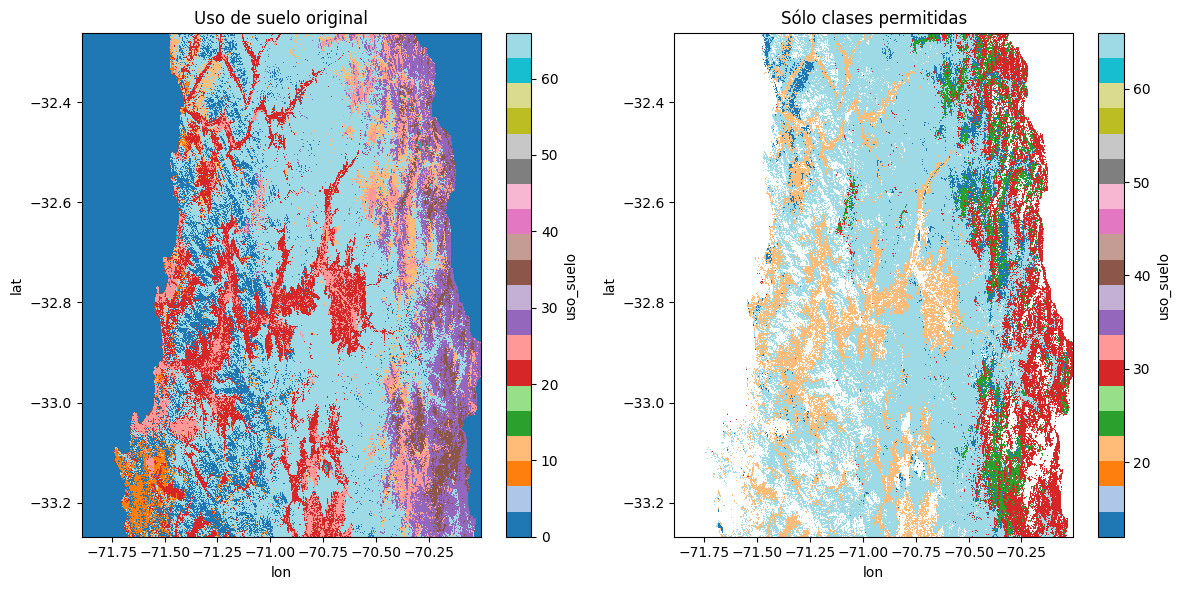

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
da.plot(ax=ax[0], cmap="tab20", add_colorbar=True)
ax[0].set_title("Uso de suelo original")

da_masked.plot(ax=ax[1], cmap="tab20", add_colorbar=True)
ax[1].set_title("Sólo clases permitidas")

plt.tight_layout()
plt.show()


In [21]:
import rioxarray

# Crear máscara binaria
land_ok = xr.where(da.isin([66, 12, 25, 29, 21]), 1, 0)

# Renombrar dims lat/lon → y/x
land_ok = land_ok.rename({"lat": "y", "lon": "x"})

# Definir CRS y ejes espaciales
land_ok = land_ok.rio.write_crs("EPSG:4326")
land_ok = land_ok.rio.set_spatial_dims(x_dim="x", y_dim="y")

# Exportar a GeoTIFF
out_tif = "land_ok_2022.tif"
land_ok.rio.to_raster(out_tif)

print("✅ Exportado:", out_tif)



✅ Exportado: land_ok_2022.tif


In [20]:
out_nc = "land_ok_2022.nc"
land_ok.to_netcdf(out_nc)
print("Exportado:", out_nc)

Exportado: land_ok_2022.nc
